# TSA Explore Exercises

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.



### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
from prepare import *

import warnings
warnings.filterwarnings("ignore")

## store item dataset

### Acuire and Prep Data

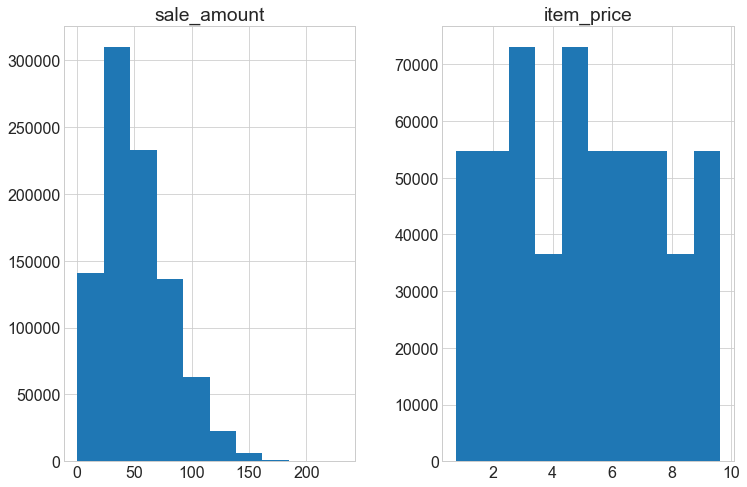

In [2]:
# acquire, clean, and prepare data using clean_items_stores_sales function from prepare.py
items_demand = clean_items_stores_sales()

In [3]:
items_demand.head(1)

item  sale_amount  sale_id  store  \
sale_date                                                      
2013-01-01 00:00:00+00:00     1         13.0        1      1   

                                    store_address   store_city  store_id  \
sale_date                                                                  
2013-01-01 00:00:00+00:00  12125 Alamo Ranch Pkwy  San Antonio         1   

                          store_state  store_zipcode item_brand  item_id  \
sale_date                                                                  
2013-01-01 00:00:00+00:00          TX          78253   Riceland      1.0   

                                                item_name  item_price  \
sale_date                                                               
2013-01-01 00:00:00+00:00  Riceland American Jazmine Rice        0.84   

                             item_upc12    item_upc14    month day_of_week  \
sale_date                                                                    
2013-01-01 00:00:00+00:00  3.520026e+10  3.520026e+10  January     Tuesday   

                           sales_total  
sale_date                               
2013-01-01 00:00:00+00:00        10.92

In [4]:
items_demand.describe

<bound method NDFrame.describe of                            item  sale_amount  sale_id  store  \
sale_date                                                      
2013-01-01 00:00:00+00:00     1         13.0        1      1   
2013-01-01 00:00:00+00:00    12         26.0   211817      7   
2013-01-01 00:00:00+00:00    46         27.0   832657      7   
2013-01-01 00:00:00+00:00    12         54.0   213643      8   
2013-01-01 00:00:00+00:00    12         35.0   215469      9   
...                         ...          ...      ...    ...   
2017-12-31 00:00:00+00:00    34         21.0   619014      9   
2017-12-31 00:00:00+00:00    34         32.0   620840     10   
2017-12-31 00:00:00+00:00    35         55.0   622666      1   
2017-12-31 00:00:00+00:00    33        100.0   598928      8   
2017-12-31 00:00:00+00:00    50         82.0   913000     10   

                                    store_address   store_city  store_id  \
sale_date                                                

### Data Splitting

Will use human-based splitting for the store item demand data. Will use the last year (2017) of data as the test set, 2016 as validate, and the rest as train. 

In [5]:
# split data into train, validate, test

In [6]:
# python warning said to use `frame.loc[string]`

In [7]:
train = items_demand.loc[:'2015'] # includes 2015
validate = items_demand.loc['2016']
test = items_demand.loc['2017']

In [8]:
# confirm slpit

In [9]:
train.shape

(547500, 18)

In [10]:
validate.shape

(183000, 18)

In [11]:
test.shape

(182500, 18)

In [12]:
# plot split data to viz

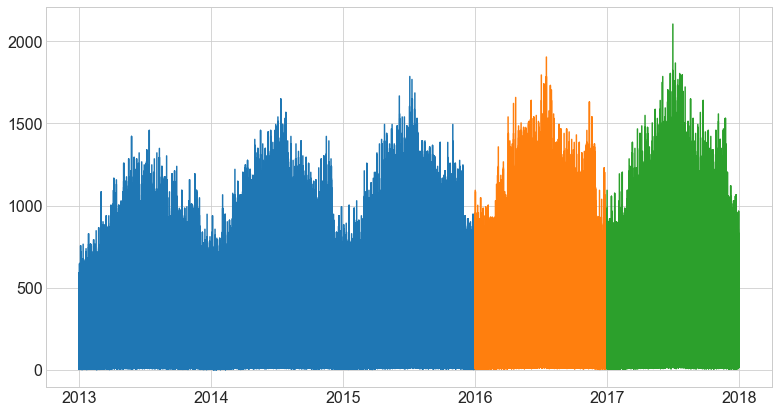

In [13]:
plt.plot(train.index, train.sales_total)
plt.plot(validate.index, validate.sales_total)
plt.plot(test.index, test.sales_total)

In [15]:
# store target var in y so that each observation is a unique date
y = train.resample('D').sales_total.mean()
y.head()



sale_date
2013-01-01 00:00:00+00:00    137.313633
2013-01-02 00:00:00+00:00    138.755667
2013-01-03 00:00:00+00:00    147.493733
2013-01-04 00:00:00+00:00    159.898400
2013-01-05 00:00:00+00:00    167.031400
Freq: D, Name: sales_total, dtype: float64

### Visualizing the data

In [16]:
# distribution of target using a hist

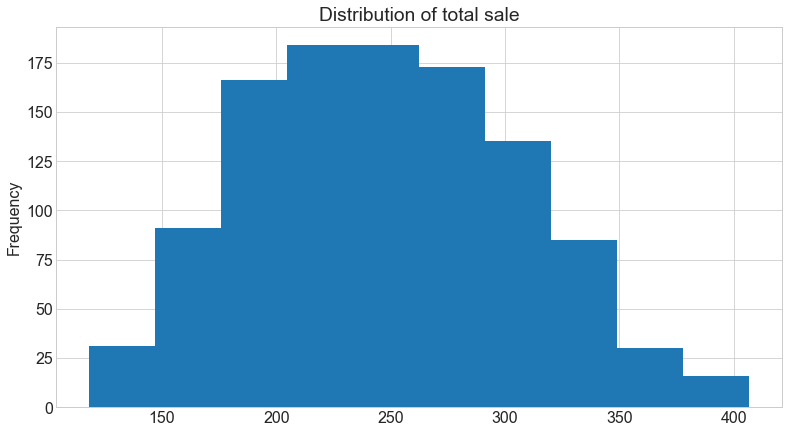

In [17]:
y.plot.hist(title='Distribution of total sale');

#### Looking at the components of the date as they relate to the target var: 

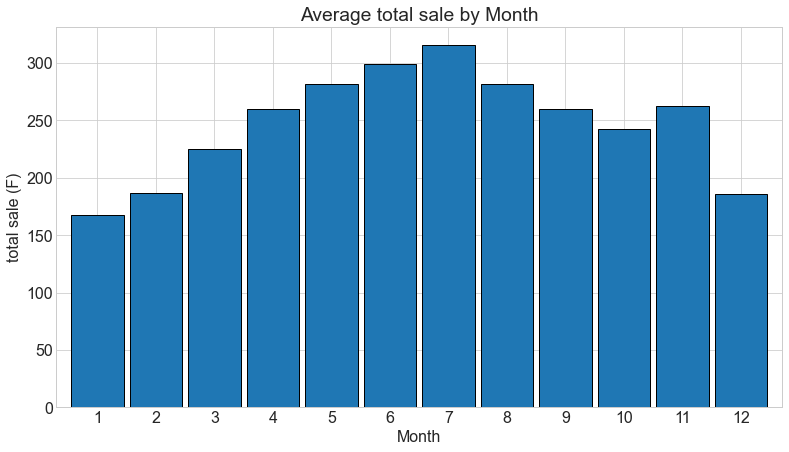

In [18]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average total sale by Month', xlabel='Month', ylabel='total sale (F)');

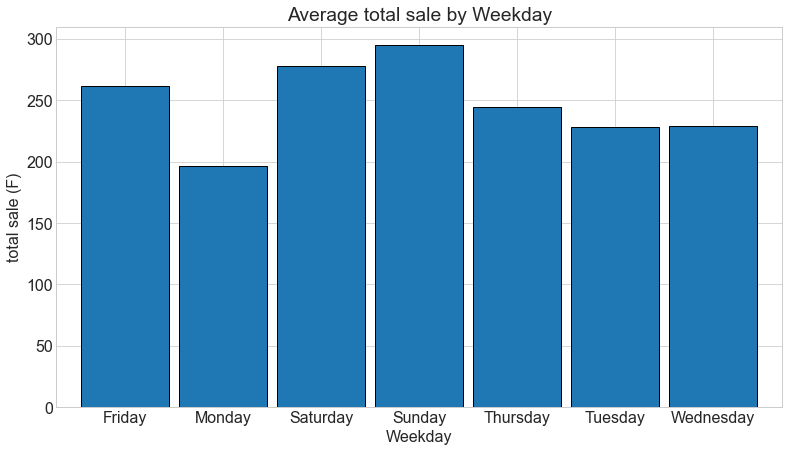

In [19]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average total sale by Weekday', xlabel='Weekday', ylabel='total sale (F)');

#### Visualizing the target over time:

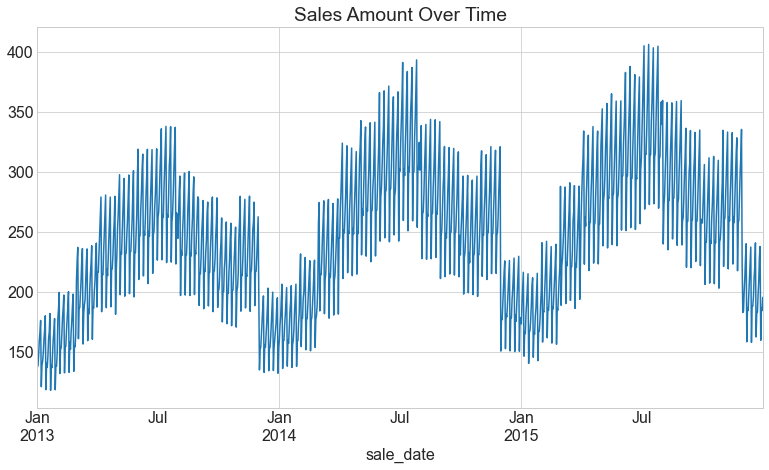

In [22]:
y.plot(title='Sales Amount Over Time');

#### Vizualizing the target over various time periods:

In [23]:
# resample data to viz over various time periods

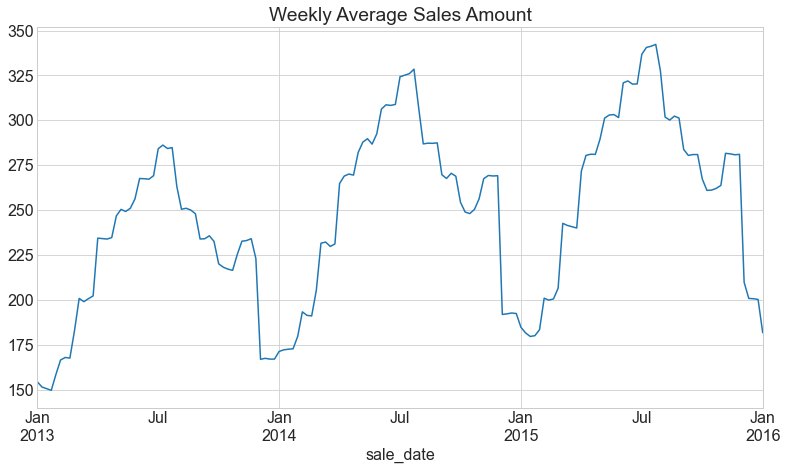

In [24]:
y.resample('1W').mean().plot(title='Weekly Average Sales Amount');

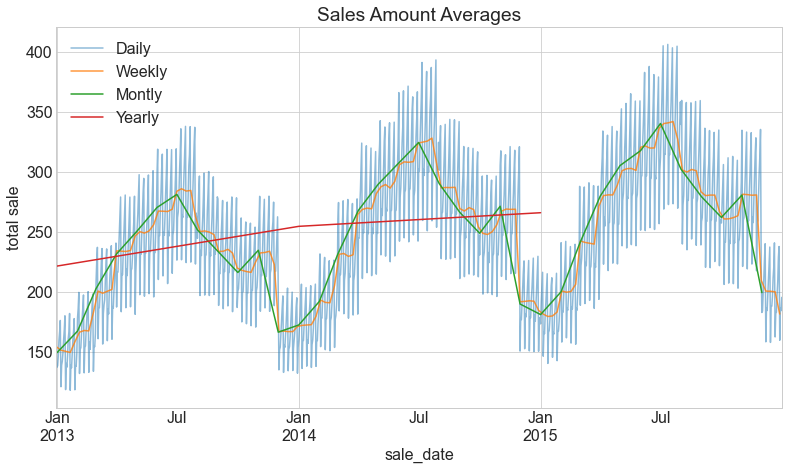

In [25]:
# viz averages by day, week, month, year
# no hourly sales data
y.resample('D').mean().plot(alpha=.5, label='Daily', title='Sales Amount Averages', xlabel='Sale Date', ylabel='total sale')
# y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend();

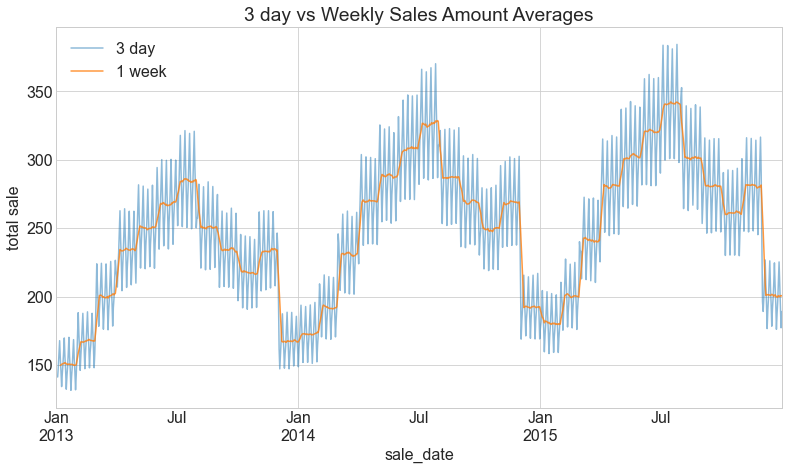

In [26]:
# use .rolling to calc moving averages
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day', title='3 day vs Weekly Sales Amount Averages', xlabel='Sale Date', ylabel='total sale')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend();

#### Visualizing changes over time: 

In [27]:
# use .diff to viz changes over time

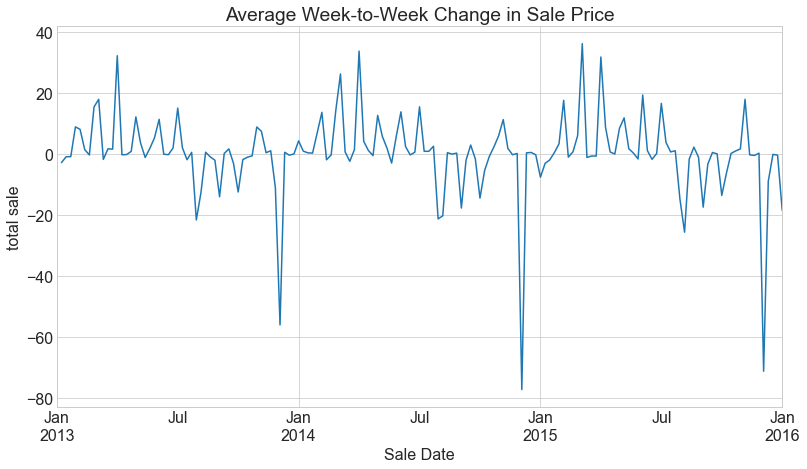

In [28]:
# week-to-week
y.resample('W').mean().diff().plot(title='Average Week-to-Week Change in Sale Price', xlabel='Sale Date', ylabel='total sale');

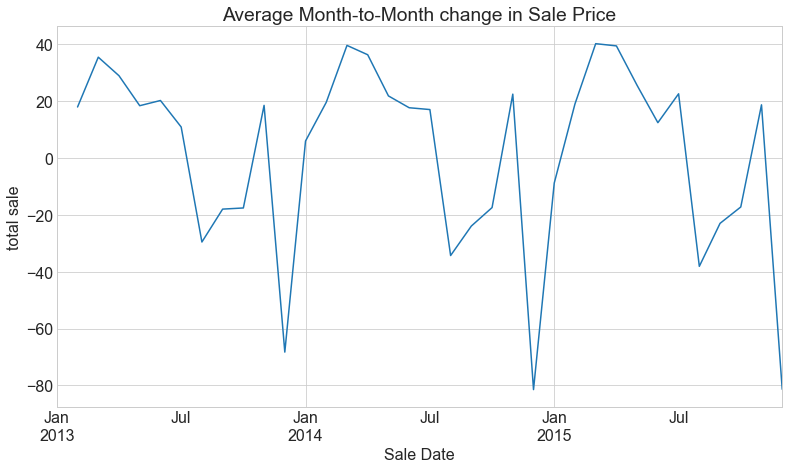

In [29]:
# month-to-month
y.resample('M').mean().diff().plot(title='Average Month-to-Month change in Sale Price', xlabel='Sale Date', ylabel='total sale');

#### Seasonal Plot

A seasonal plot shows the comparison of multiple years together (year-over-year difference).

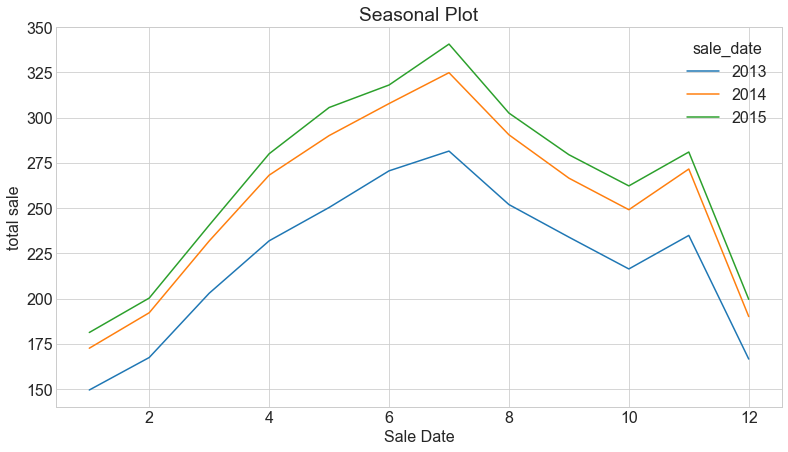

In [30]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot', xlabel='Sale Date', ylabel='total sale');

#### Seasonal Subseries

Show the changes year-over-year but by month. 

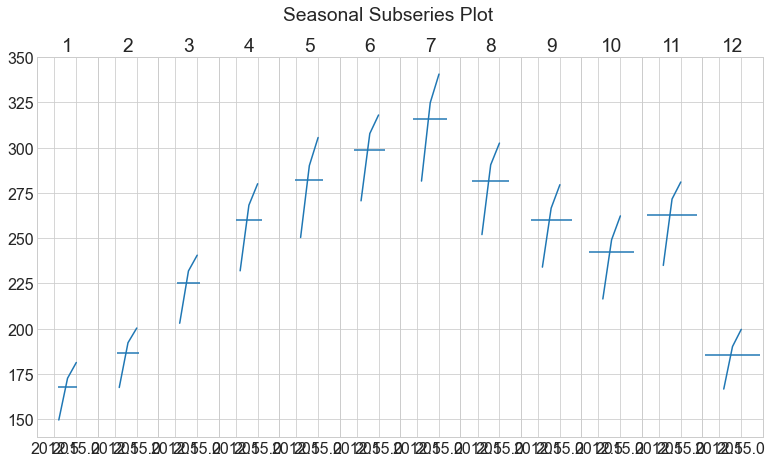

In [31]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### Lag Plot

A log plot is a scatter plot that measures a value aginst the last or next value. 

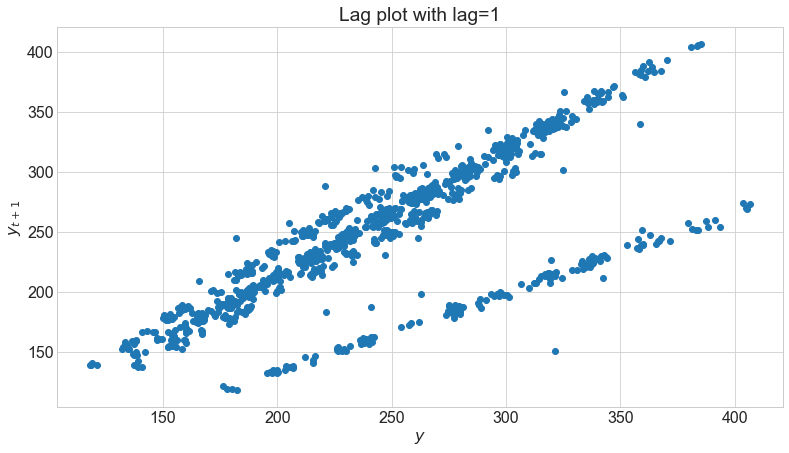

In [32]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1');


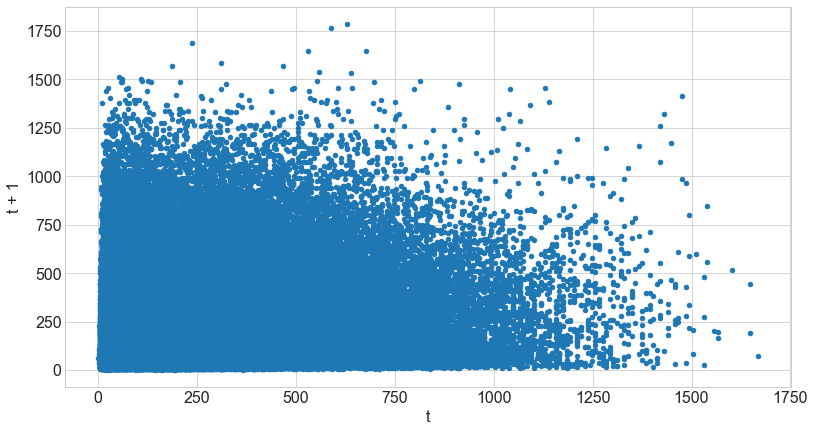

In [33]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1');

In [34]:
del train['y(t + 1)']

item  sale_amount   sale_id  store  store_id  \
sale_date                                                                 
2013-01-06 00:00:00+00:00  25.5    30.355667  455590.5    5.5       5.5   
2013-01-13 00:00:00+00:00  25.5    29.686286  455597.0    5.5       5.5   
2013-01-20 00:00:00+00:00  25.5    29.414286  455604.0    5.5       5.5   
2013-01-27 00:00:00+00:00  25.5    29.513714  455611.0    5.5       5.5   
2013-02-03 00:00:00+00:00  25.5    31.150571  455618.0    5.5       5.5   
...                         ...          ...       ...    ...       ...   
2015-12-06 00:00:00+00:00  25.5    41.171143  456654.0    5.5       5.5   
2015-12-13 00:00:00+00:00  25.5    39.317143  456661.0    5.5       5.5   
2015-12-20 00:00:00+00:00  25.5    39.510286  456668.0    5.5       5.5   
2015-12-27 00:00:00+00:00  25.5    39.342857  456675.0    5.5       5.5   
2016-01-03 00:00:00+00:00  25.5    35.770000  456680.5    5.5       5.5   

                           store_zipcode    item_id  item_price    item_upc12  \
sale_date                                                                       
2013-01-06 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-01-13 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-01-20 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-01-27 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-02-03 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
...                                  ...        ...         ...           ...   
2015-12-06 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2015-12-13 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2015-12-20 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2015-12-27 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2016-01-03 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   

                             item_upc14   this_week  the_next_week  
sale_date                                                           
2013-01-06 00:00:00+00:00  2.235129e+11  154.485156     151.621995  
2013-01-13 00:00:00+00:00  2.235129e+11  151.621995     150.679543  
2013-01-20 00:00:00+00:00  2.235129e+11  150.679543     149.772519  
2013-01-27 00:00:00+00:00  2.235129e+11  149.772519     158.608300  
2013-02-03 00:00:00+00:00  2.235129e+11  158.608300     166.648357  
...                                 ...         ...            ...  
2015-12-06 00:00:00+00:00  2.235129e+11  209.904643     200.915133  
2015-12-13 00:00:00+00:00  2.235129e+11  200.915133     200.748924  
2015-12-20 00:00:00+00:00  2.235129e+11  200.748924     200.341648  
2015-12-27 00:00:00+00:00  2.235129e+11  200.341648     181.811683  
2016-01-03 00:00:00+00:00  2.235129e+11  181.811683            NaN  

[157 rows x 12 columns]

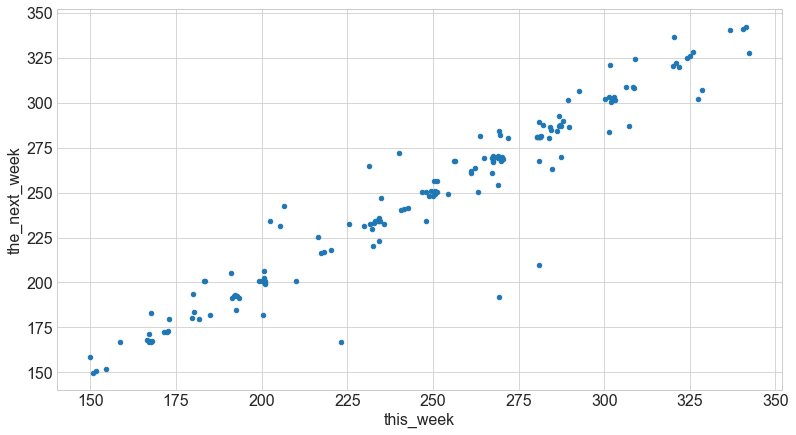

In [35]:
# show next week's sales amounts
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week');
weekly

Shows a linear correlation.

item  sale_amount   sale_id  store  store_id  \
sale_date                                                                 
2013-01-06 00:00:00+00:00  25.5    30.355667  455590.5    5.5       5.5   
2013-01-13 00:00:00+00:00  25.5    29.686286  455597.0    5.5       5.5   
2013-01-20 00:00:00+00:00  25.5    29.414286  455604.0    5.5       5.5   
2013-01-27 00:00:00+00:00  25.5    29.513714  455611.0    5.5       5.5   
2013-02-03 00:00:00+00:00  25.5    31.150571  455618.0    5.5       5.5   
...                         ...          ...       ...    ...       ...   
2015-12-06 00:00:00+00:00  25.5    41.171143  456654.0    5.5       5.5   
2015-12-13 00:00:00+00:00  25.5    39.317143  456661.0    5.5       5.5   
2015-12-20 00:00:00+00:00  25.5    39.510286  456668.0    5.5       5.5   
2015-12-27 00:00:00+00:00  25.5    39.342857  456675.0    5.5       5.5   
2016-01-03 00:00:00+00:00  25.5    35.770000  456680.5    5.5       5.5   

                           store_zipcode    item_id  item_price    item_upc12  \
sale_date                                                                       
2013-01-06 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-01-13 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-01-20 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-01-27 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-02-03 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
...                                  ...        ...         ...           ...   
2015-12-06 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2015-12-13 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2015-12-20 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2015-12-27 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2016-01-03 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   

                             item_upc14   this_week  12_weeks_out  
sale_date                                                          
2013-01-06 00:00:00+00:00  2.235129e+11  154.485156    202.316543  
2013-01-13 00:00:00+00:00  2.235129e+11  151.621995    234.464262  
2013-01-20 00:00:00+00:00  2.235129e+11  150.679543    234.177114  
2013-01-27 00:00:00+00:00  2.235129e+11  149.772519    233.947690  
2013-02-03 00:00:00+00:00  2.235129e+11  158.608300    234.765281  
...                                 ...         ...           ...  
2015-12-06 00:00:00+00:00  2.235129e+11  209.904643           NaN  
2015-12-13 00:00:00+00:00  2.235129e+11  200.915133           NaN  
2015-12-20 00:00:00+00:00  2.235129e+11  200.748924           NaN  
2015-12-27 00:00:00+00:00  2.235129e+11  200.341648           NaN  
2016-01-03 00:00:00+00:00  2.235129e+11  181.811683           NaN  

[157 rows x 12 columns]

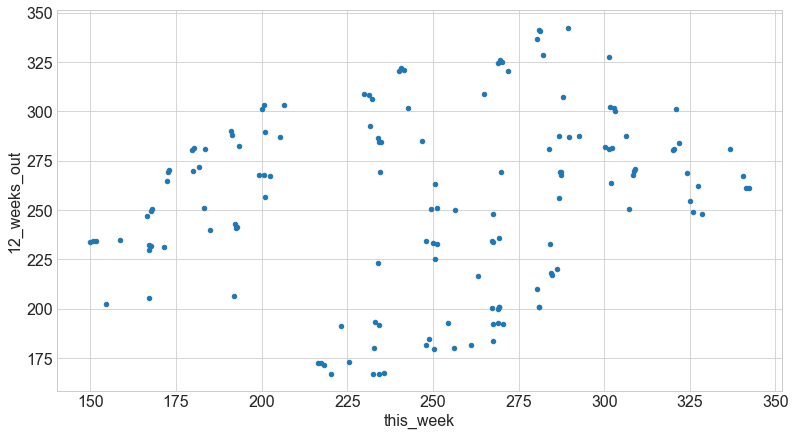

In [36]:
# with a longer lag time

weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out');
weekly

Can't see a pattern anymore.

item  sale_amount   sale_id  store  store_id  \
sale_date                                                                 
2013-01-06 00:00:00+00:00  25.5    30.355667  455590.5    5.5       5.5   
2013-01-13 00:00:00+00:00  25.5    29.686286  455597.0    5.5       5.5   
2013-01-20 00:00:00+00:00  25.5    29.414286  455604.0    5.5       5.5   
2013-01-27 00:00:00+00:00  25.5    29.513714  455611.0    5.5       5.5   
2013-02-03 00:00:00+00:00  25.5    31.150571  455618.0    5.5       5.5   
...                         ...          ...       ...    ...       ...   
2015-12-06 00:00:00+00:00  25.5    41.171143  456654.0    5.5       5.5   
2015-12-13 00:00:00+00:00  25.5    39.317143  456661.0    5.5       5.5   
2015-12-20 00:00:00+00:00  25.5    39.510286  456668.0    5.5       5.5   
2015-12-27 00:00:00+00:00  25.5    39.342857  456675.0    5.5       5.5   
2016-01-03 00:00:00+00:00  25.5    35.770000  456680.5    5.5       5.5   

                           store_zipcode    item_id  item_price    item_upc12  \
sale_date                                                                       
2013-01-06 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-01-13 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-01-20 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-01-27 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2013-02-03 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
...                                  ...        ...         ...           ...   
2015-12-06 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2015-12-13 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2015-12-20 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2015-12-27 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   
2016-01-03 00:00:00+00:00        78224.8  22.166667    5.004667  2.235129e+11   

                             item_upc14   this_week  half_a_year_later  
sale_date                                                               
2013-01-06 00:00:00+00:00  2.235129e+11  154.485156         284.217319  
2013-01-13 00:00:00+00:00  2.235129e+11  151.621995         286.241214  
2013-01-20 00:00:00+00:00  2.235129e+11  150.679543         284.327857  
2013-01-27 00:00:00+00:00  2.235129e+11  149.772519         284.835581  
2013-02-03 00:00:00+00:00  2.235129e+11  158.608300         263.193048  
...                                 ...         ...                ...  
2015-12-06 00:00:00+00:00  2.235129e+11  209.904643                NaN  
2015-12-13 00:00:00+00:00  2.235129e+11  200.915133                NaN  
2015-12-20 00:00:00+00:00  2.235129e+11  200.748924                NaN  
2015-12-27 00:00:00+00:00  2.235129e+11  200.341648                NaN  
2016-01-03 00:00:00+00:00  2.235129e+11  181.811683                NaN  

[157 rows x 12 columns]

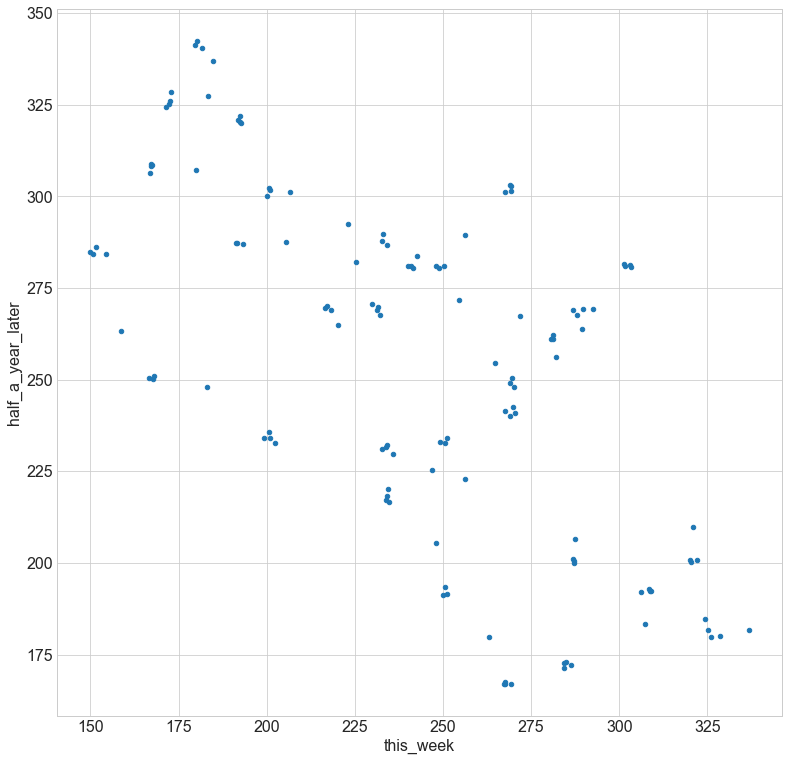

In [37]:
# 26 week lag
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13));
weekly


#### Autocorrelation 

a measure of the linear relationship between lagged values 


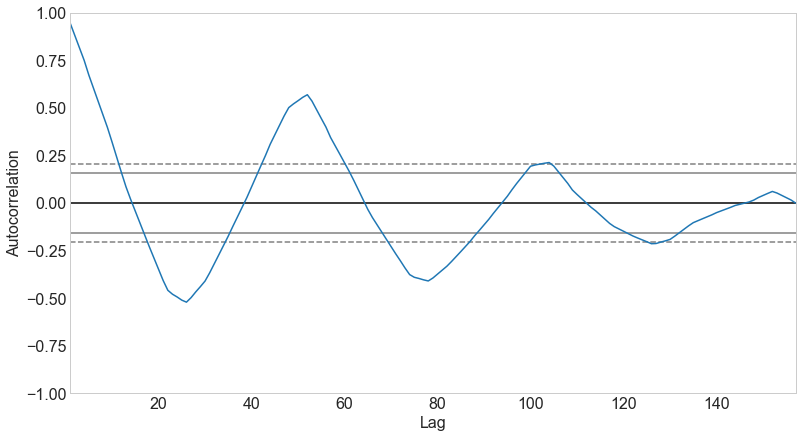

In [38]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean());

peaks = frequency of the seasonality

valleys = where corr is the most neg

#### Seasonal Decomposition

Breaks time series into seasonal repeated cycle, long term trend, and random noise. 

In [39]:
# use seasonal_decompose from statsmodels library

In [40]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend   seasonal  resid
sale_date                                                     
2013-01-06 00:00:00+00:00  154.485156    NaN -70.566889    NaN
2013-01-13 00:00:00+00:00  151.621995    NaN -72.189198    NaN
2013-01-20 00:00:00+00:00  150.679543    NaN -73.546663    NaN
2013-01-27 00:00:00+00:00  149.772519    NaN -73.757924    NaN
2013-02-03 00:00:00+00:00  158.608300    NaN -69.217867    NaN

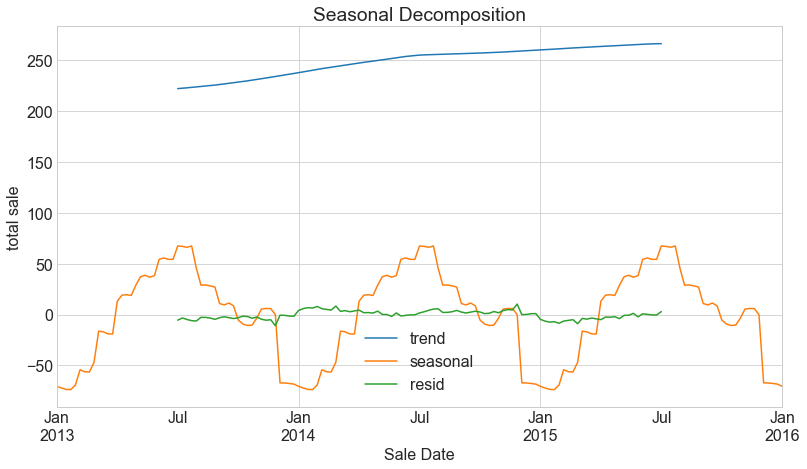

In [41]:
decomposition.iloc[:, 1:].plot(title='Seasonal Decomposition', xlabel='Sale Date', ylabel='total sale');

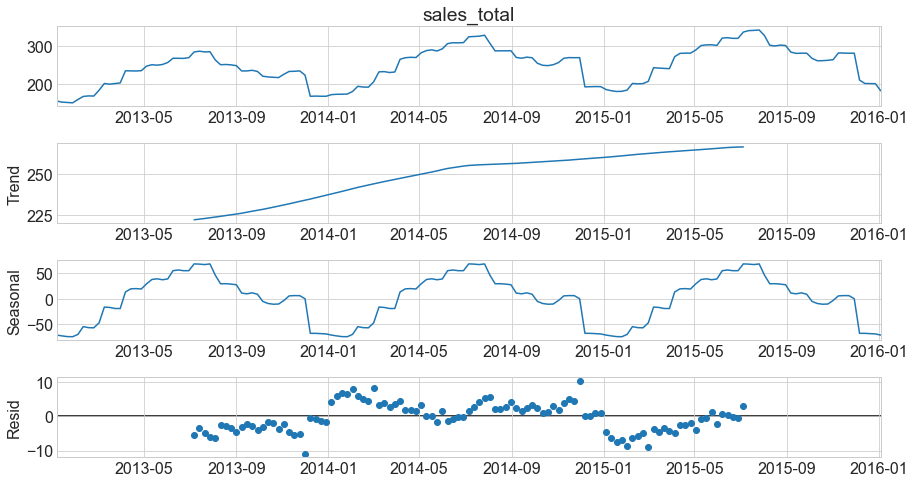

In [42]:
# plot the value that is returned
result.plot()
None

#### Categories Over Time

In [43]:
train = train.resample('D').mean()
# create a cat feature by binning sales_total
train['sales_total_bin'] = pd.qcut(train.sales_total, 3, labels=['low', 'moderate', 'high'])
train.groupby('sales_total_bin').mean()

item  sale_amount        sale_id  store  store_id  \
sales_total_bin                                                      
low              25.5    35.910142  456015.191781    5.5       5.5   
moderate         25.5    48.385912  456130.380822    5.5       5.5   
high             25.5    61.531956  456259.427397    5.5       5.5   

                 store_zipcode    item_id  item_price    item_upc12  \
sales_total_bin                                                       
low                    78224.8  22.166667    5.004667  2.235129e+11   
moderate               78224.8  22.166667    5.004667  2.235129e+11   
high                   78224.8  22.166667    5.004667  2.235129e+11   

                   item_upc14  sales_total  
sales_total_bin                             
low              2.235129e+11   182.915344  
moderate         2.235129e+11   246.540900  
high             2.235129e+11   313.503660

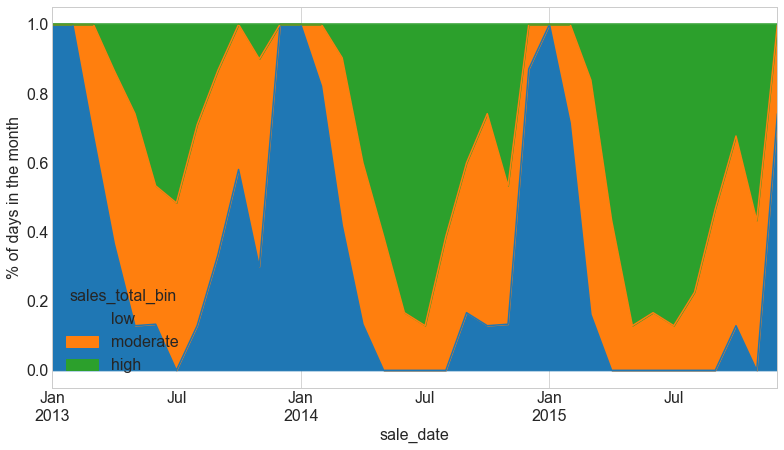

In [44]:
# distribution of sales_amount_bin over time
(train.groupby('sales_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month');

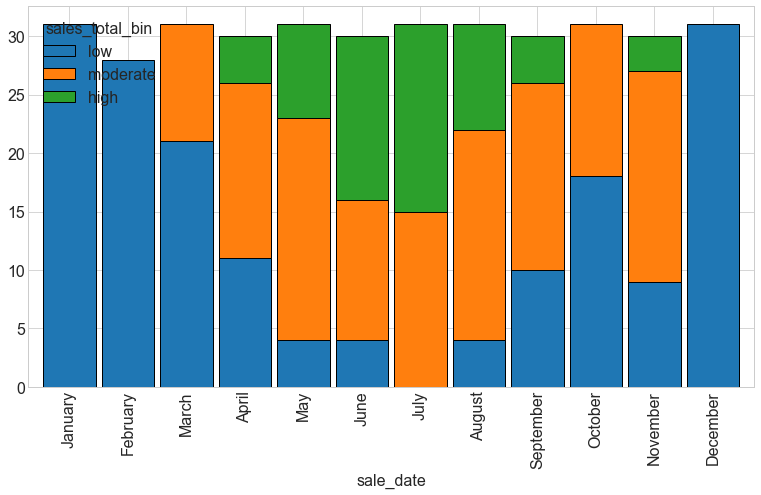

In [45]:
ax = (train['2013']
 .groupby('sales_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

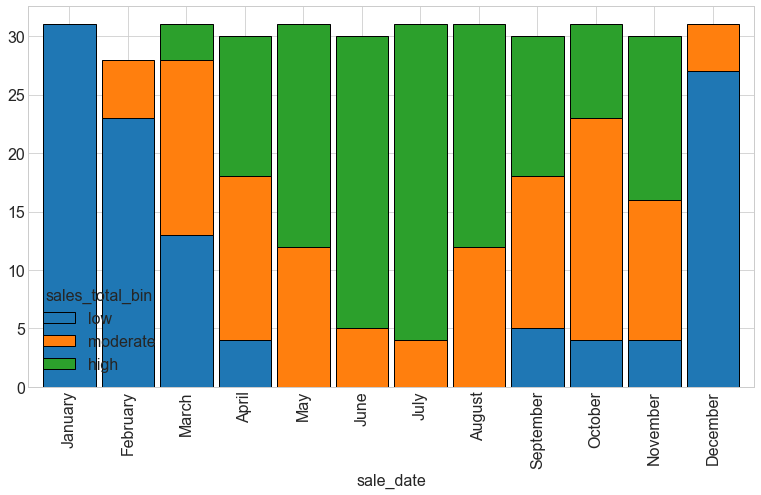

In [46]:
ax = (train['2014']
 .groupby('sales_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

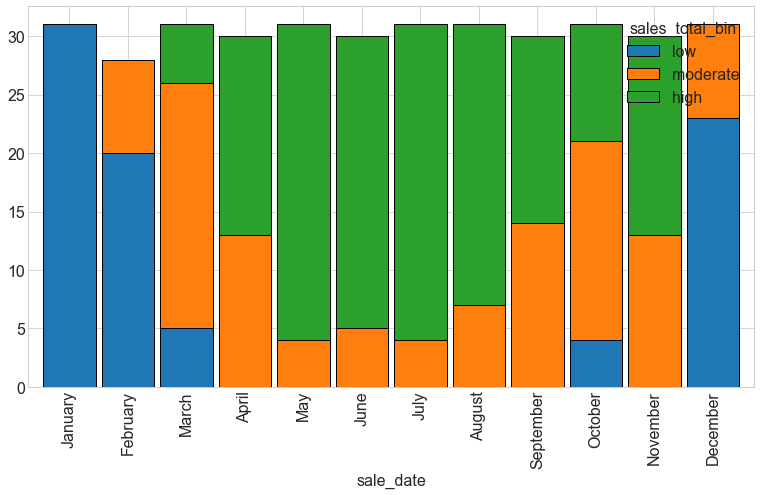

In [47]:
ax = (train['2015']
 .groupby('sales_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

#### strftime

To keep month names (in this case) in order, format them so that a number is prepended to them. This way they won't be sorted alphabetically and will stay in their logical order. 

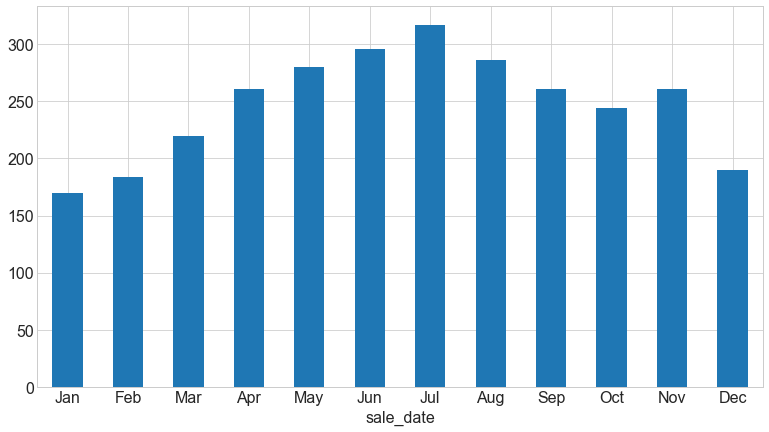

In [48]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

#### Custom Formatting 

Use plt.plot or ax.plot and pass  datetime index as your x values for custom formatting. 

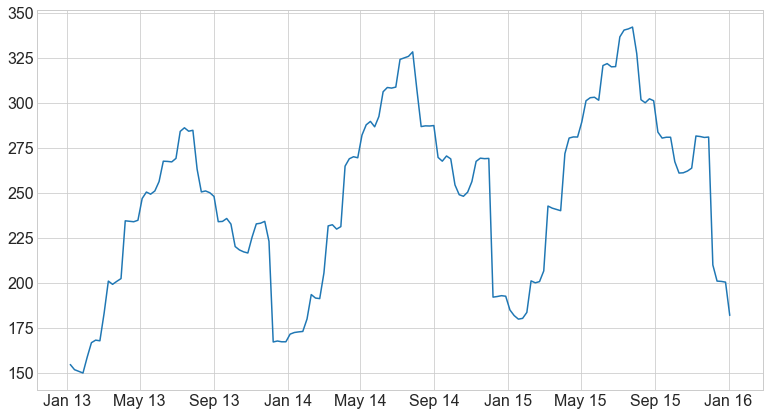

In [49]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

## opsd dataset

### Acuire and Prep Data

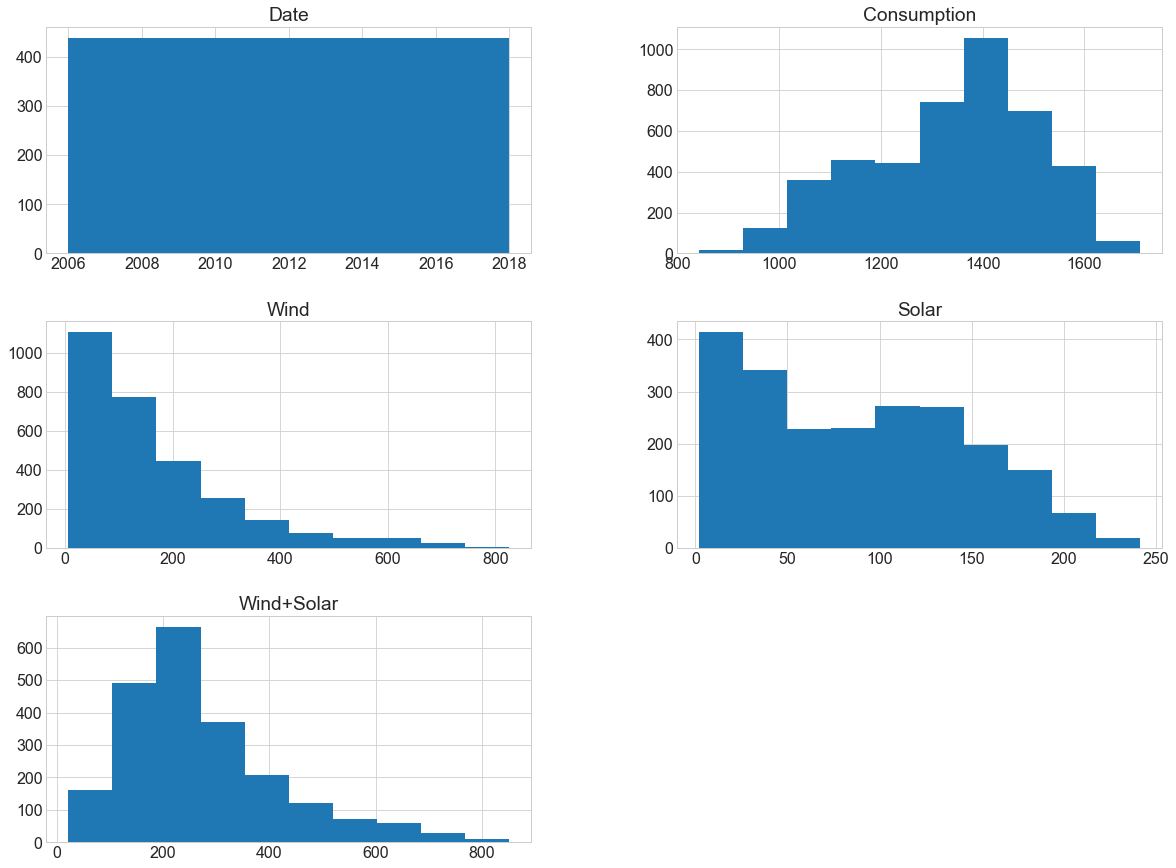

In [50]:
# acquire, clean, and prepare data using clean_germany_power_data function from prepare.py
opsd = clean_germany_power_data()

In [51]:
opsd.head(1)

Consumption  Wind  Solar  Wind+Solar    month  year
Date                                                           
2006-01-01     1069.184   0.0    0.0         0.0  January  2006

In [52]:
opsd.describe

<bound method NDFrame.describe of             Consumption     Wind   Solar  Wind+Solar     month  year
Date                                                                
2006-01-01   1069.18400    0.000   0.000       0.000   January  2006
2006-01-02   1380.52100    0.000   0.000       0.000   January  2006
2006-01-03   1442.53300    0.000   0.000       0.000   January  2006
2006-01-04   1457.21700    0.000   0.000       0.000   January  2006
2006-01-05   1477.13100    0.000   0.000       0.000   January  2006
...                 ...      ...     ...         ...       ...   ...
2017-12-27   1263.94091  394.507  16.530     411.037  December  2017
2017-12-28   1299.86398  506.424  14.162     520.586  December  2017
2017-12-29   1295.08753  584.277  29.854     614.131  December  2017
2017-12-30   1215.44897  721.247   7.467     728.714  December  2017
2017-12-31   1107.11488  721.176  19.980     741.156  December  2017

[4383 rows x 6 columns]>

### Data Splitting
Will use human-based splitting for the store item demand data. Will use the last year (2017) of data as the test set, 2016 as validate, and the rest as train.

In [53]:
# split data into train, validate, test
train = opsd.loc[:'2015'] # includes 2015
validate = opsd.loc['2016']
test = opsd.loc['2017']

In [54]:
train.head(1)

Consumption  Wind  Solar  Wind+Solar    month  year
Date                                                           
2006-01-01     1069.184   0.0    0.0         0.0  January  2006

In [55]:
train.shape

(3652, 6)

In [56]:
validate.shape

(366, 6)

In [57]:
test.shape

(365, 6)

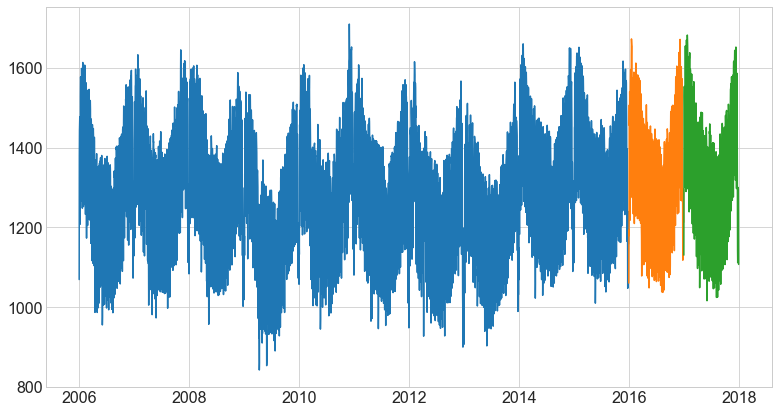

In [58]:
# plot split data to viz

plt.plot(train.index, train.Consumption)
plt.plot(validate.index, validate.Consumption)
plt.plot(test.index, test.Consumption);

In [59]:
# store target var in y
y = train.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

### Visualizing the data

In [60]:
# distribution of target using a hist

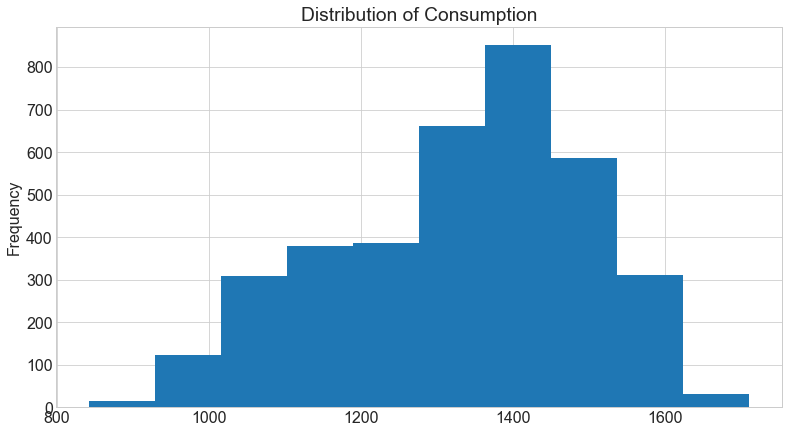

In [61]:
y.plot.hist(title='Distribution of Consumption');

#### Looking at the components of the date as they relate to the target var:

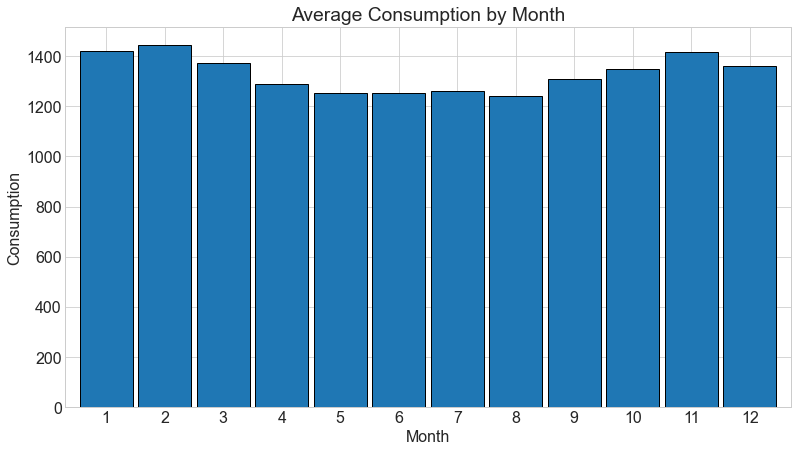

In [62]:
# avg by month
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption');

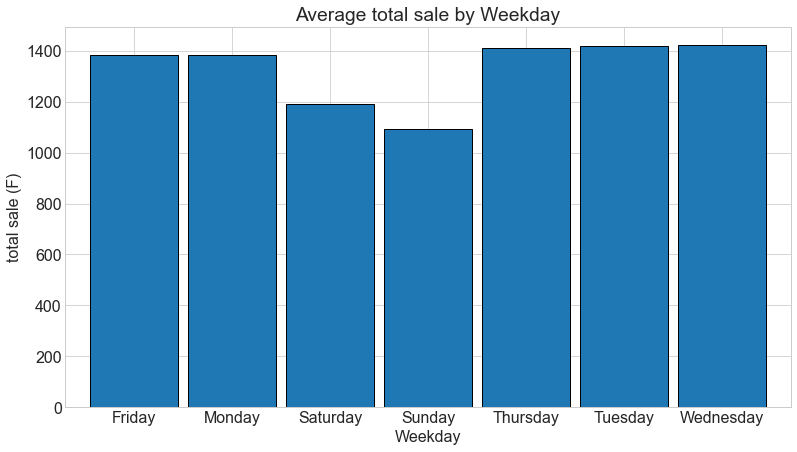

In [63]:
# avg by weekday
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average total sale by Weekday', xlabel='Weekday', ylabel='total sale (F)');

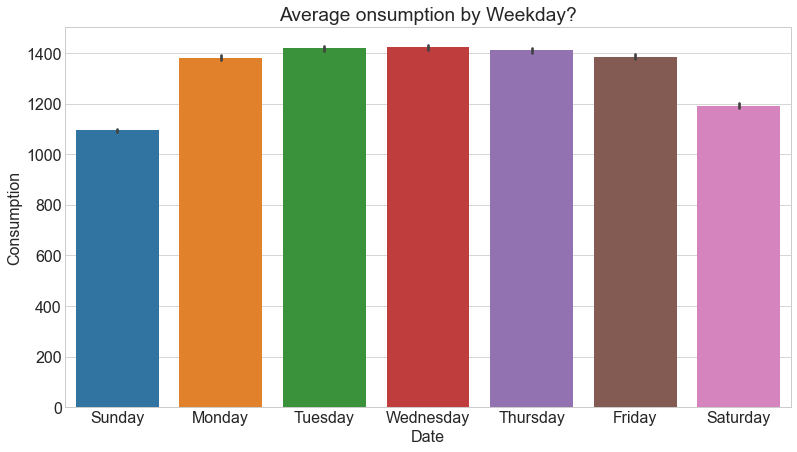

In [64]:
sns.barplot(data=train, y='Consumption', x=y.index.day_name())
plt.title("Average onsumption by Weekday?")
plt.show()

#### Visualizing the target over time:

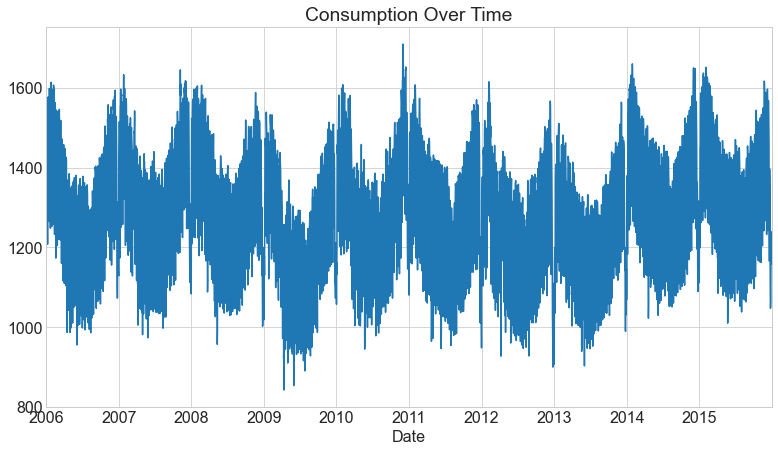

In [65]:
y.plot(title='Consumption Over Time');

#### Vizualizing the target over various time periods:

In [66]:
# resample data to viz over various time periods

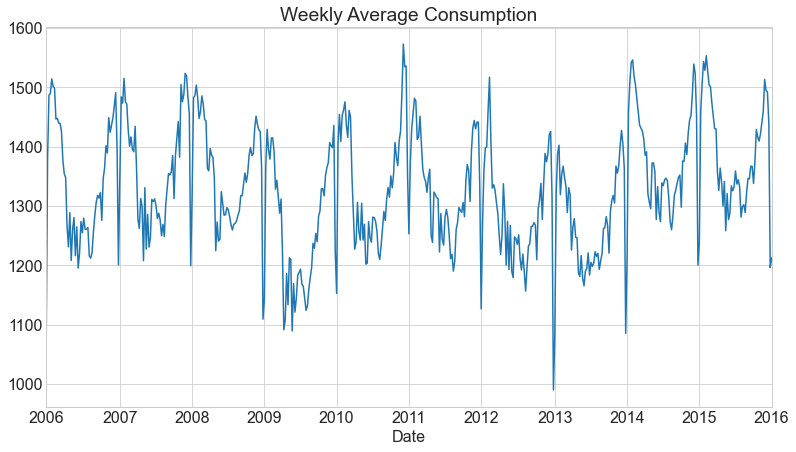

In [67]:
# weekly
y.resample('1W').mean().plot(title='Weekly Average Consumption');

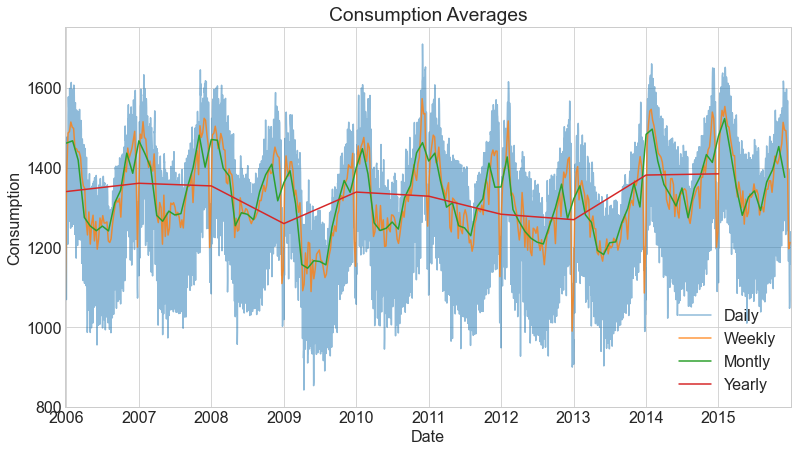

In [68]:
# viz averages by day, week, month, year
# no hourly sales data
y.resample('D').mean().plot(alpha=.5, label='Daily', title='Consumption Averages', xlabel='Date', ylabel='Consumption')
# y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend();

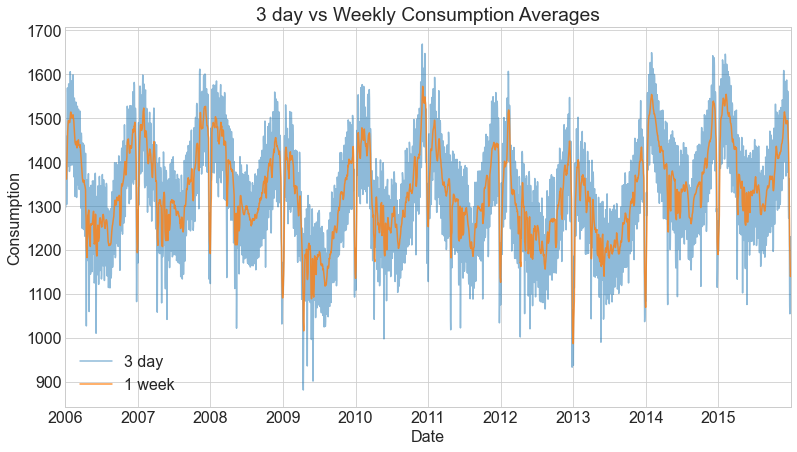

In [69]:
# use .rolling to calc moving averages
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day', title='3 day vs Weekly Consumption Averages', xlabel='Date', ylabel='Consumption')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend();

#### Visualizing changes over time:

In [70]:
# use .diff to viz changes over time

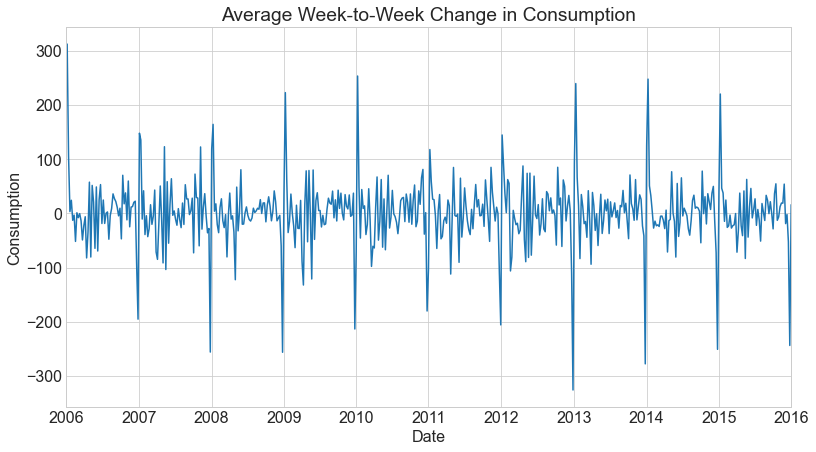

In [71]:
# week-to-week
y.resample('W').mean().diff().plot(title='Average Week-to-Week Change in Consumption', xlabel='Date', ylabel='Consumption');

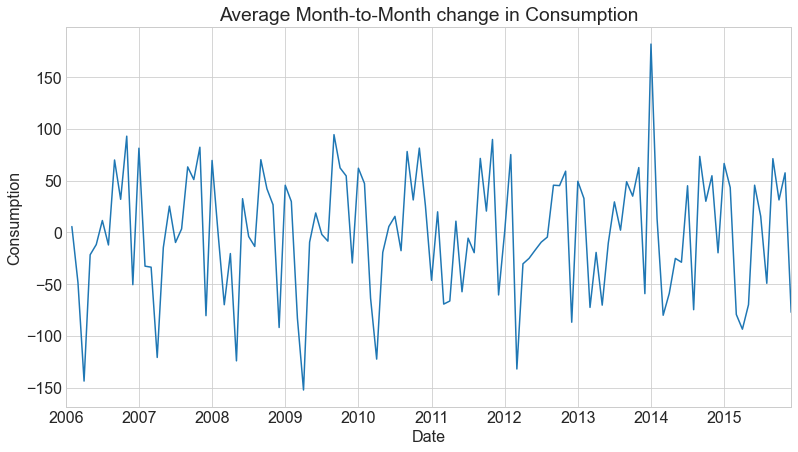

In [72]:
# month-to-month
y.resample('M').mean().diff().plot(title='Average Month-to-Month change in Consumption', xlabel='Date', ylabel='Consumption');

#### Seasonal Plot

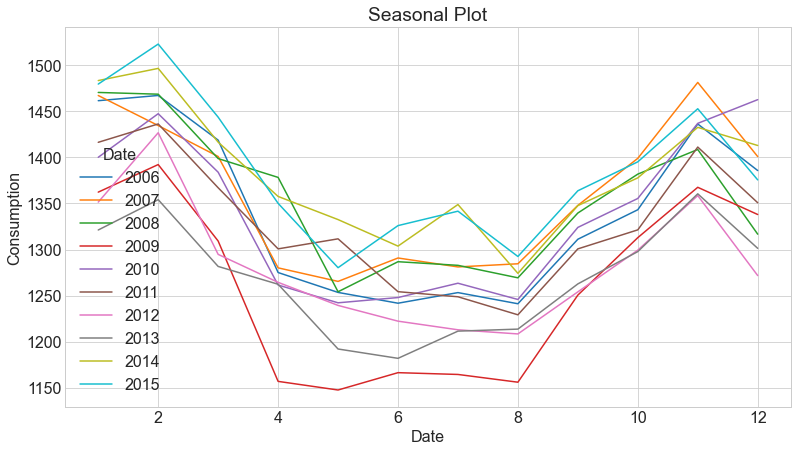

In [73]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot', xlabel='Date', ylabel='Consumption');

#### Seasonal Subseries

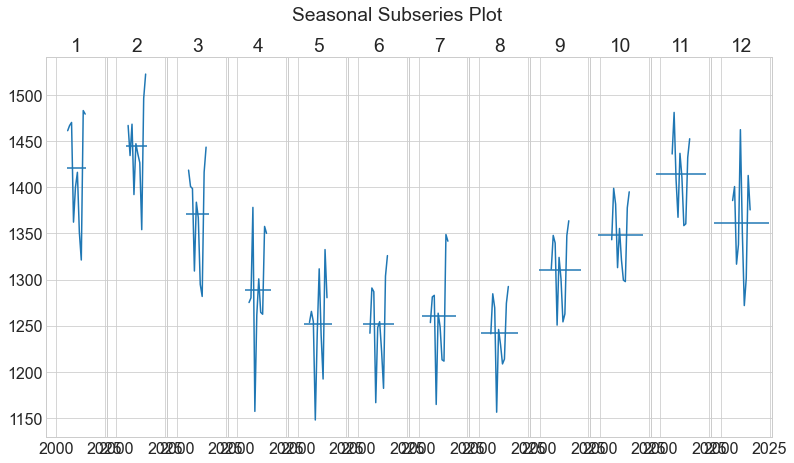

In [74]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### Lag Plot

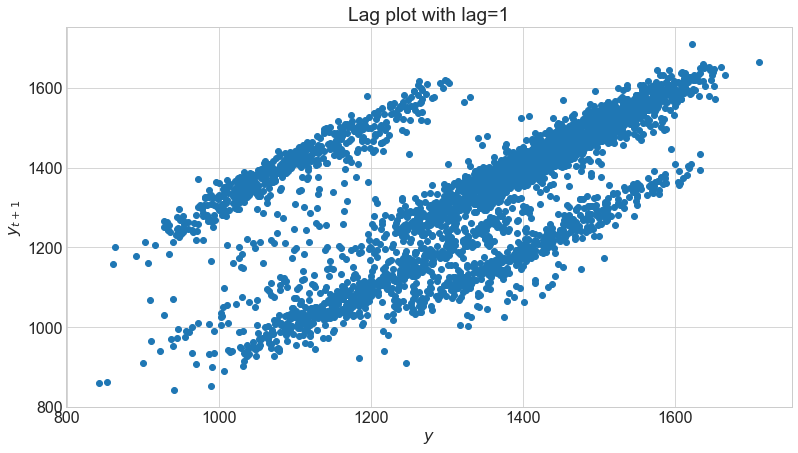

In [75]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1');

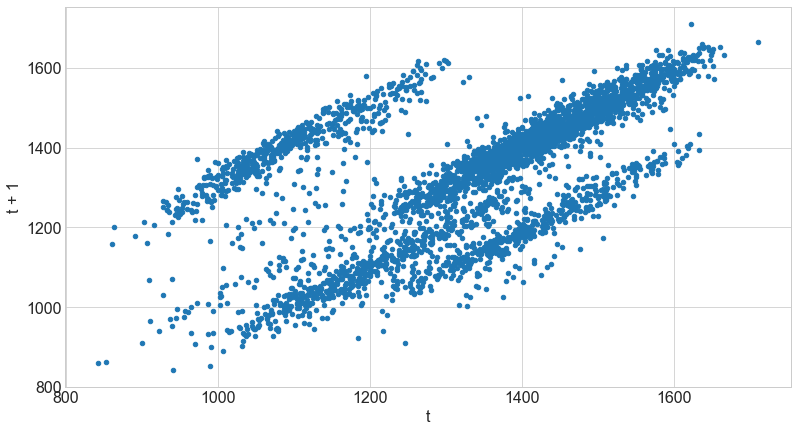

In [76]:
train['y(t + 1)'] = train.Consumption.shift(-1)
ax = train.plot.scatter(x='Consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1');

In [77]:
del train['y(t + 1)']

this_week        Wind      Solar  Wind+Solar    year  \
Date                                                                 
2006-01-01  1069.184000    0.000000   0.000000    0.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000  2006.0   
...                 ...         ...        ...         ...     ...   
2015-12-06  1494.494429  472.525143  23.427000  495.952143  2015.0   
2015-12-13  1492.382000  317.984857  30.106000  348.090857  2015.0   
2015-12-20  1440.003000  258.151143  20.911286  279.062429  2015.0   
2015-12-27  1196.463286  527.319714  31.421286  558.741000  2015.0   
2016-01-03  1212.425250  308.833000  30.454250  339.287250  2015.0   

            the_next_week  
Date                       
2006-01-01    1381.300143  
2006-01-08    1486.730286  
2006-01-15    1490.031143  
2006-01-22    1514.176857  
2006-01-29    1501.403286  
...                   ...  
2015-12-06    1492.382000  
2015-12-13    1440.003000  
2015-12-20    1196.463286  
2015-12-27    1212.425250  
2016-01-03            NaN  

[523 rows x 6 columns]

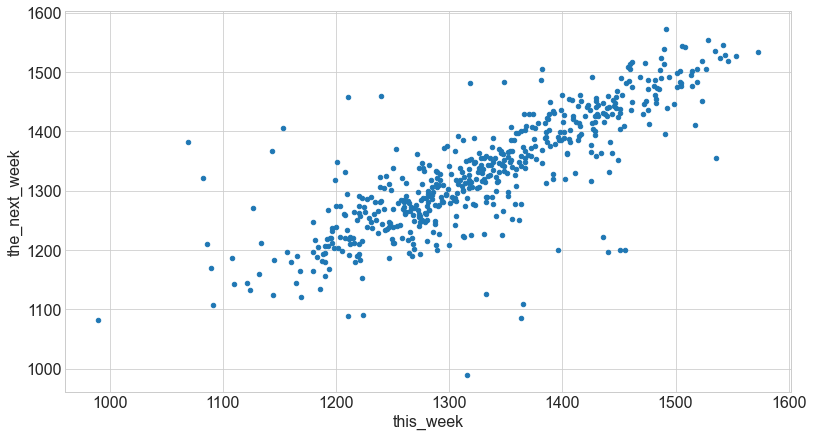

In [78]:
# show next week's Consumption
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.Consumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week');
weekly

this_week        Wind      Solar  Wind+Solar    year  \
Date                                                                 
2006-01-01  1069.184000    0.000000   0.000000    0.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000  2006.0   
...                 ...         ...        ...         ...     ...   
2015-12-06  1494.494429  472.525143  23.427000  495.952143  2015.0   
2015-12-13  1492.382000  317.984857  30.106000  348.090857  2015.0   
2015-12-20  1440.003000  258.151143  20.911286  279.062429  2015.0   
2015-12-27  1196.463286  527.319714  31.421286  558.741000  2015.0   
2016-01-03  1212.425250  308.833000  30.454250  339.287250  2015.0   

            12_weeks_out  
Date                      
2006-01-01   1376.688714  
2006-01-08   1354.122000  
2006-01-15   1347.883429  
2006-01-22   1265.716143  
2006-01-29   1231.136143  
...                  ...  
2015-12-06           NaN  
2015-12-13           NaN  
2015-12-20           NaN  
2015-12-27           NaN  
2016-01-03           NaN  

[523 rows x 6 columns]

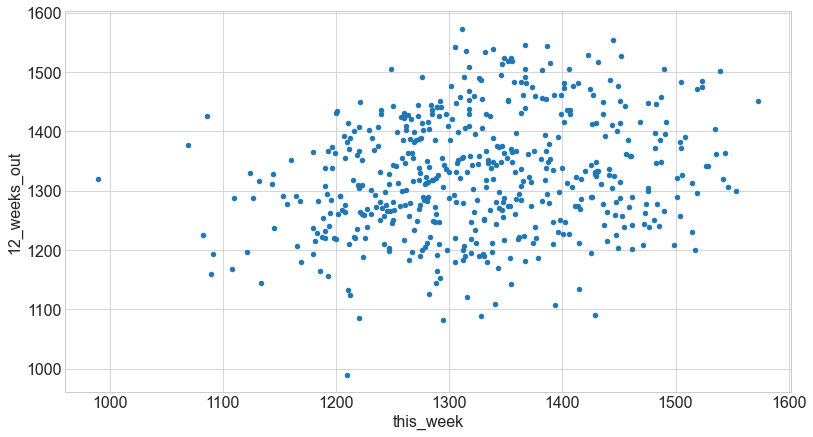

In [79]:
# with a longer lag time

weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.Consumption.shift(-12)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out');
weekly

this_week        Wind      Solar  Wind+Solar    year  \
Date                                                                 
2006-01-01  1069.184000    0.000000   0.000000    0.000000  2006.0   
2006-01-08  1381.300143    0.000000   0.000000    0.000000  2006.0   
2006-01-15  1486.730286    0.000000   0.000000    0.000000  2006.0   
2006-01-22  1490.031143    0.000000   0.000000    0.000000  2006.0   
2006-01-29  1514.176857    0.000000   0.000000    0.000000  2006.0   
...                 ...         ...        ...         ...     ...   
2015-12-06  1494.494429  472.525143  23.427000  495.952143  2015.0   
2015-12-13  1492.382000  317.984857  30.106000  348.090857  2015.0   
2015-12-20  1440.003000  258.151143  20.911286  279.062429  2015.0   
2015-12-27  1196.463286  527.319714  31.421286  558.741000  2015.0   
2016-01-03  1212.425250  308.833000  30.454250  339.287250  2015.0   

            half_a_year_later  
Date                           
2006-01-01        1254.896857  
2006-01-08        1279.510571  
2006-01-15        1260.945286  
2006-01-22        1261.179714  
2006-01-29        1263.756571  
...                       ...  
2015-12-06                NaN  
2015-12-13                NaN  
2015-12-20                NaN  
2015-12-27                NaN  
2016-01-03                NaN  

[523 rows x 6 columns]

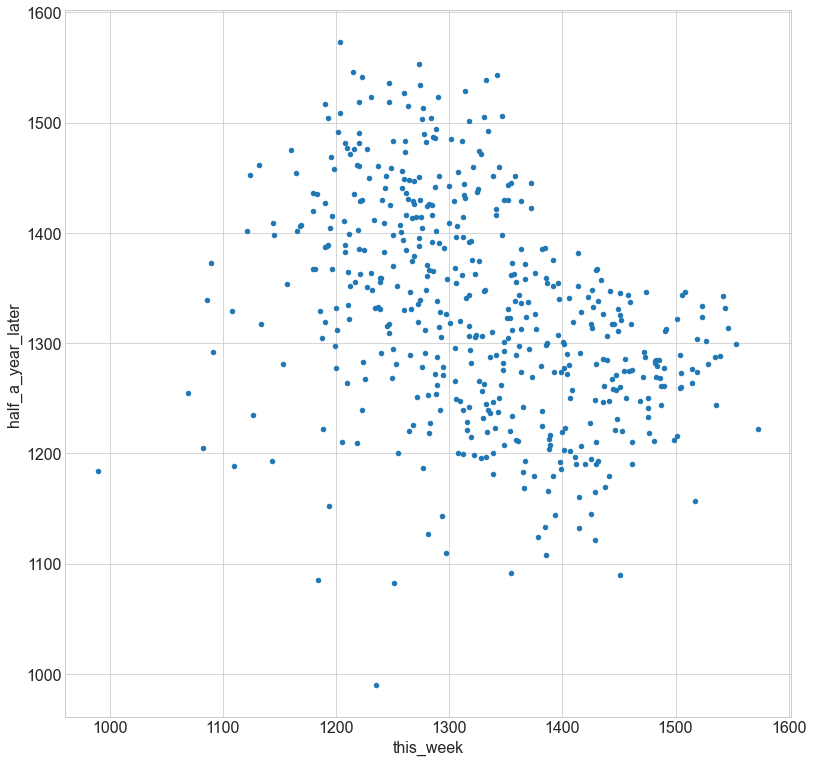

In [80]:
# 26 week lag
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.Consumption.shift(-26)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13));
weekly

#### Autocorrelation

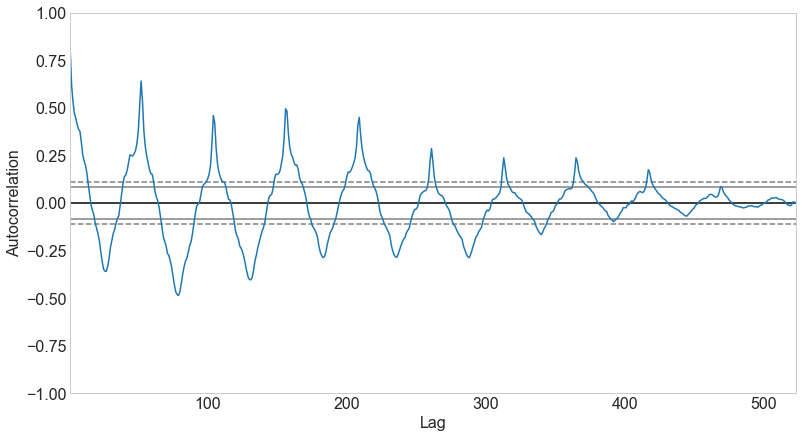

In [81]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean());

#### Seasonal Decomposition

In [82]:
# use seasonal_decompose from statsmodels library
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend    seasonal  resid
Date                                             
2006-01-01  1069.184000    NaN  -43.458036    NaN
2006-01-08  1381.300143    NaN -147.058362    NaN
2006-01-15  1486.730286    NaN   -3.385190    NaN
2006-01-22  1490.031143    NaN  103.169142    NaN
2006-01-29  1514.176857    NaN  125.746777    NaN

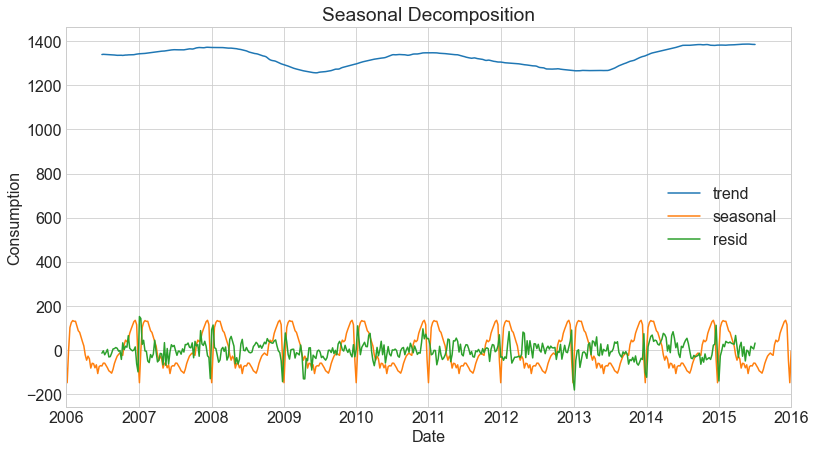

In [83]:
# Consumption
decomposition.iloc[:, 1:].plot(title='Seasonal Decomposition', xlabel='Date', ylabel='Consumption');

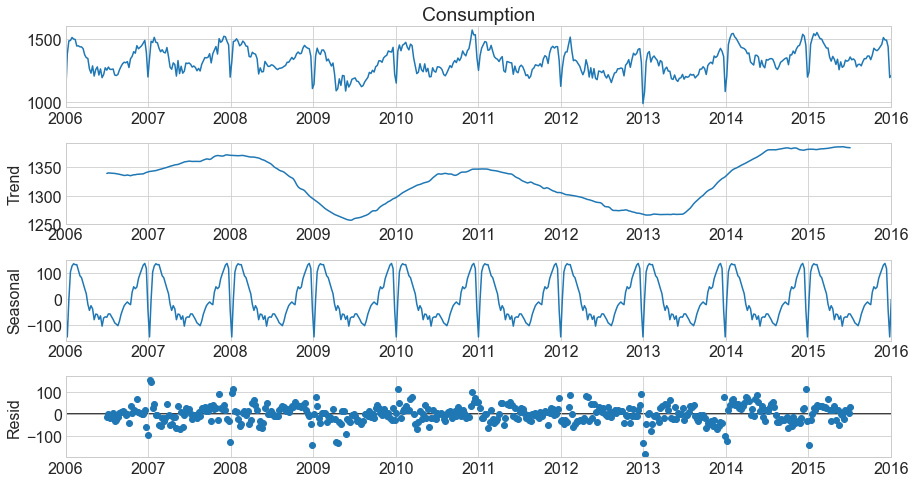

In [84]:
# plot the value that is returned
result.plot()
None

In [85]:
# use seasonal_decompose from statsmodels library
y = train.Wind.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend   seasonal  resid
Date                                    
2006-01-01  0.0    NaN  38.252735    NaN
2006-01-08  0.0    NaN  62.516589    NaN
2006-01-15  0.0    NaN  84.216533    NaN
2006-01-22  0.0    NaN  69.045440    NaN
2006-01-29  0.0    NaN  25.173403    NaN

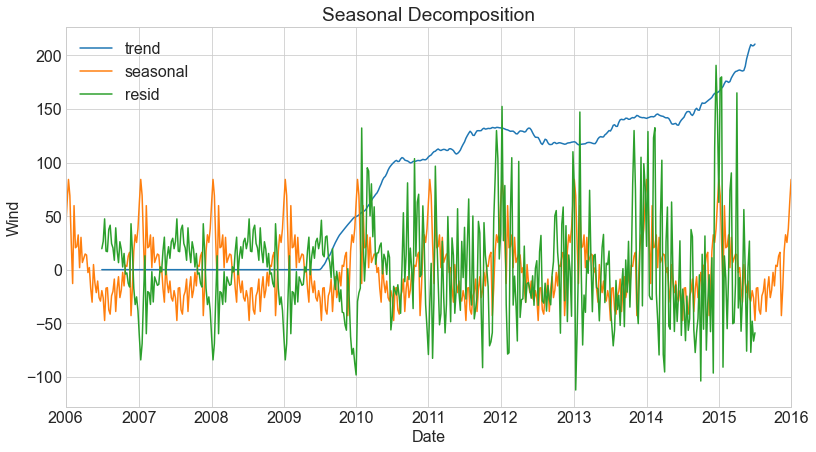

In [86]:
# Wind
decomposition.iloc[:, 1:].plot(title='Seasonal Decomposition', xlabel='Date', ylabel='Wind');

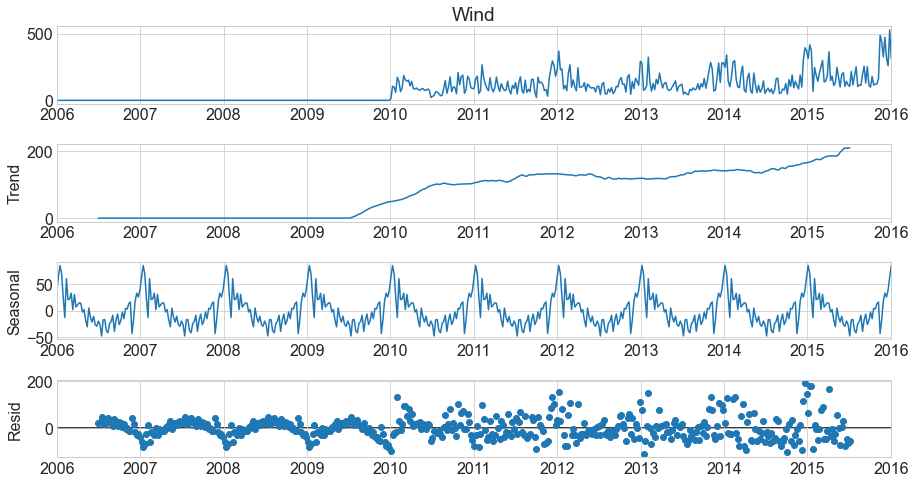

In [87]:
# plot the value that is returned
result.plot()
None

In [88]:
# use seasonal_decompose from statsmodels library
y = train.Solar.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend   seasonal  resid
Date                                    
2006-01-01  0.0    NaN -27.222991    NaN
2006-01-08  0.0    NaN -25.650673    NaN
2006-01-15  0.0    NaN -26.575177    NaN
2006-01-22  0.0    NaN -24.114277    NaN
2006-01-29  0.0    NaN -25.801276    NaN

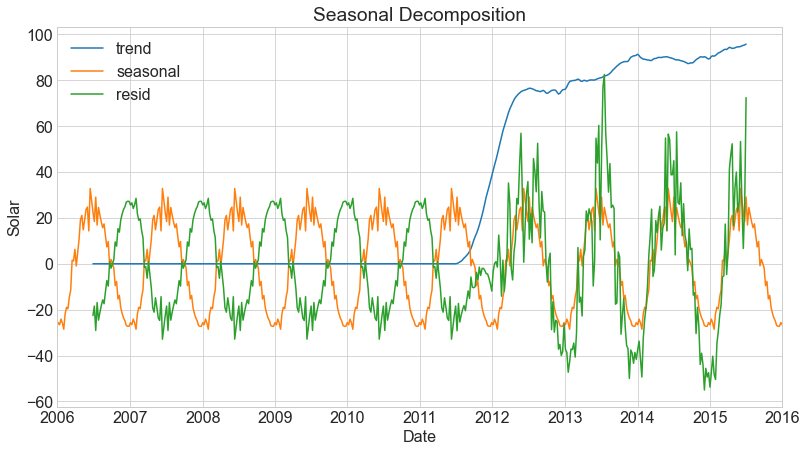

In [89]:
# Solar
decomposition.iloc[:, 1:].plot(title='Seasonal Decomposition', xlabel='Date', ylabel='Solar');

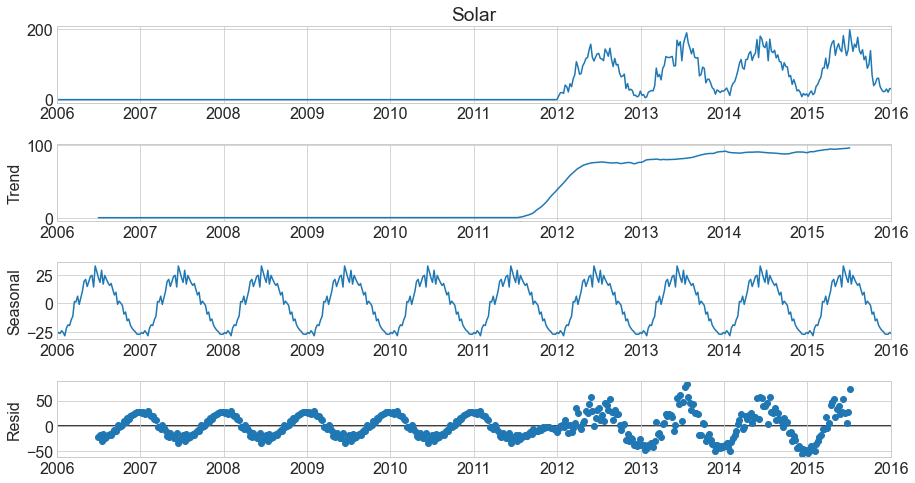

In [90]:
# plot the value that is returned
result.plot()
None

In [91]:
train['wind_solar'] = train['Wind'] + train['Solar']

In [92]:
# use seasonal_decompose from statsmodels library
y = train.wind_solar.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend   seasonal  resid
Date                                    
2006-01-01  0.0    NaN  11.029745    NaN
2006-01-08  0.0    NaN  36.865916    NaN
2006-01-15  0.0    NaN  57.641356    NaN
2006-01-22  0.0    NaN  44.931163    NaN
2006-01-29  0.0    NaN  -0.627872    NaN

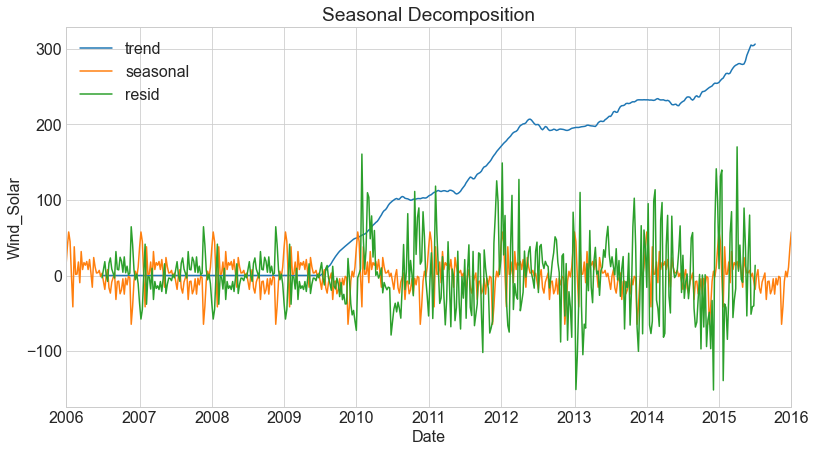

In [93]:
# Wind_Solar
decomposition.iloc[:, 1:].plot(title='Seasonal Decomposition', xlabel='Date', ylabel='Wind_Solar');

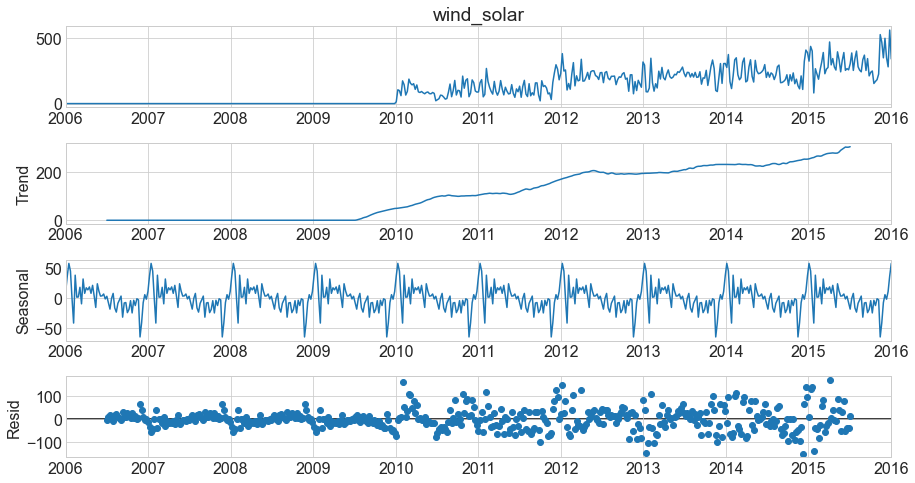

In [94]:
# plot the value that is returned
result.plot()
None